In [128]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import os
# %matplotlib inline
# plt.rcParams['figure.figsize'] = [8, 6]

In [129]:
def map_entries(e):
    k, v = e.split(':')
    return (k, [float(v)])
def me2dict(d):
    return dict(list(map(map_entries, d.split(","))))


In [130]:
ALGOS = ['Sequentiall', 'Incorrect NAME', 'Parallel-2', 'Parallel-3']

In [131]:

def get_speedup(m, a):
    speedup = m.drop(columns='algo').loc[0] / m.drop(columns='algo').loc[a]
    return speedup

In [132]:
def get_data(file, algos):
    with open(file) as f:
        a = f.read().split()
        a = list(filter(lambda l: l != 'Not sorted', a))
        # print(a)
        data_d = list(map(me2dict, a))
        c = 0
        for d in data_d:
            d['algo'] = [algos[c]]
            c+=1
            c%=len(algos)
        for i in range(1, len(data_d)):
            for k in data_d[0]:
                data_d[0][k] += data_d[i][k]

    df = pd.DataFrame.from_dict(data_d[0])
    return df


In [133]:
def plot(df, i,  t='buckets_no'):
    # plt.figure(figsize=(16,16))
    a = df.loc[df['algo'] == i]
    a.drop(columns=['algo', 'buckets', 'arr_s', 'total_time']).plot(kind='bar', stacked=True)
    plt.ylabel('time_taken')
    plt.xlabel(t)
    # plt.xticks(list(range(len(a))))
    plt.xticks([])
    plt.title(f"time for algo. {ALGOS[i]}")

def plot_s(df, i, t='buckets_no'):
    a = df.drop(columns=['buckets', 'arr_s'])
    d1 = a.loc[a['algo'] == i].drop(columns='algo')
    d2 = a.loc[a['algo'] == 0].drop(columns='algo')
    d1, d2 = np.array(d1), np.array(d2)
    a = d1 / d2
    d = pd.DataFrame(data=a, columns=df.columns[2:7])
    d.plot(kind='line', stacked=True)
    plt.title(f"speedup for algo. {ALGOS[i]}")
    plt.xlabel(t)


## Seq

In [134]:
seq_df = get_data('seq-res.txt', [0])
# seq_df[40:100]['total_time'] += 0.05

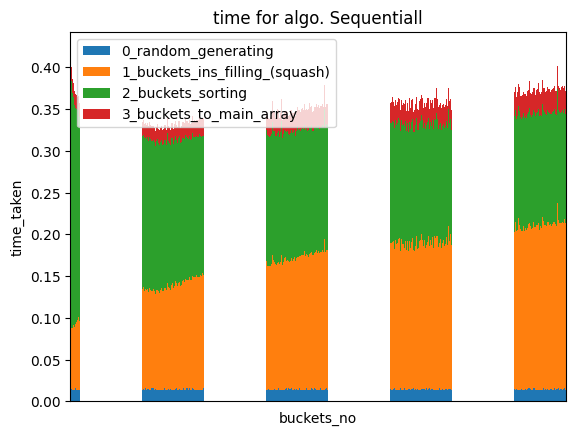

In [135]:
plot(seq_df, 0)

## Both parallel

In [136]:
def stats_print(df, t):
    sns.scatterplot(data=df, x=t, y='total_time', hue='algo')
    plot(df, 0, t=t)
    plot(df, 2, t=t)
    plot(df, 3, t=t)

    plot_s(df, 2, t=t)
    plot_s(df, 3, t=t)

## total time vs arr_size

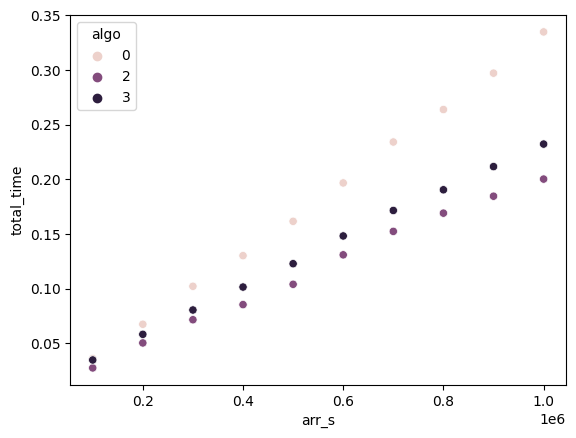

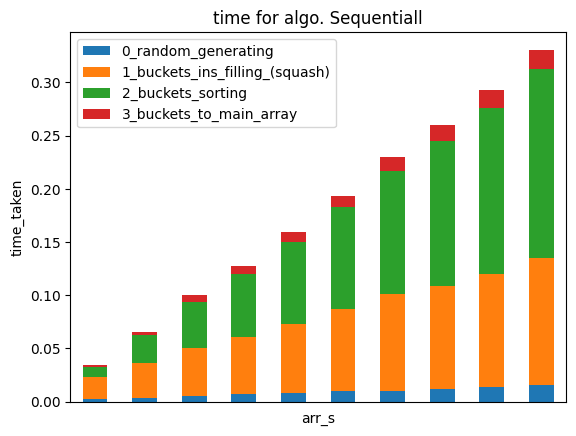

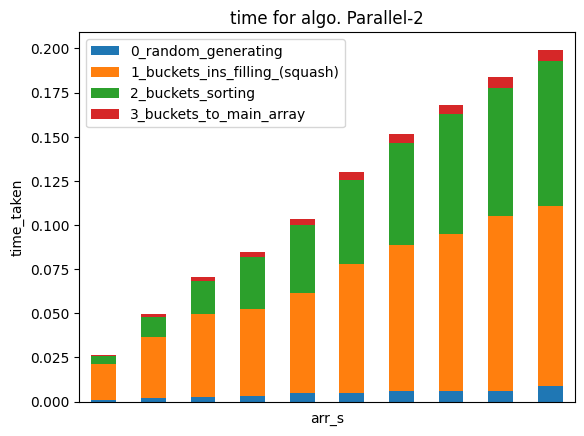

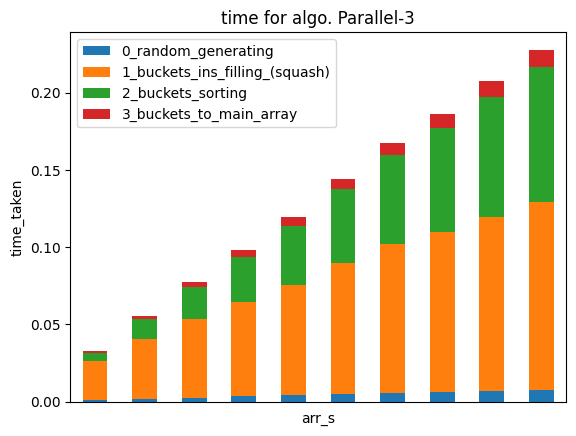

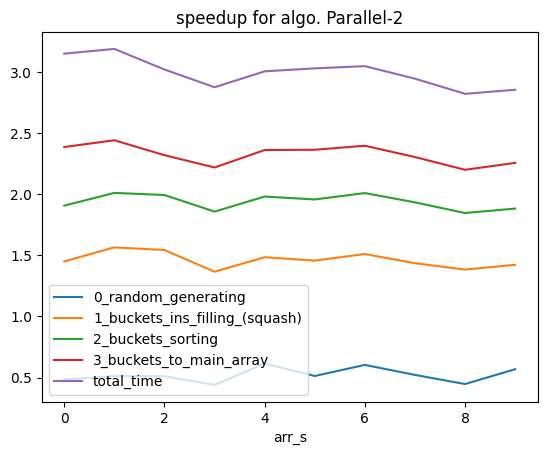

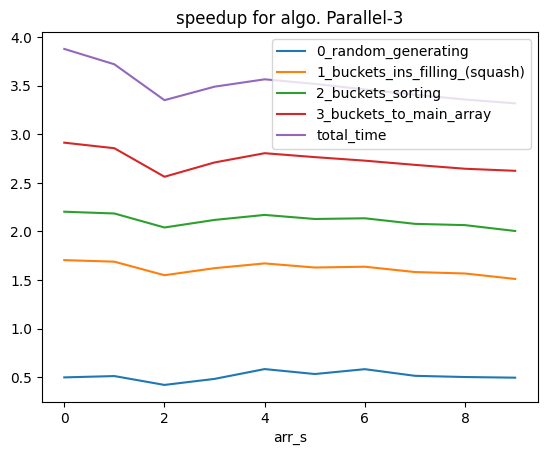

In [137]:
i = 2
df = get_data(f'buckets{i}.txt', [0, 2, 3])
stats_print(df, 'arr_s')

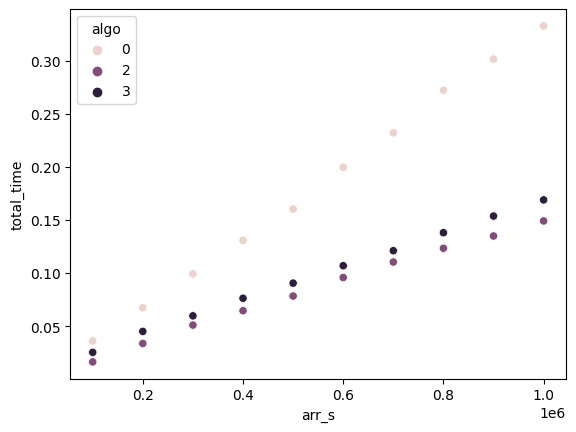

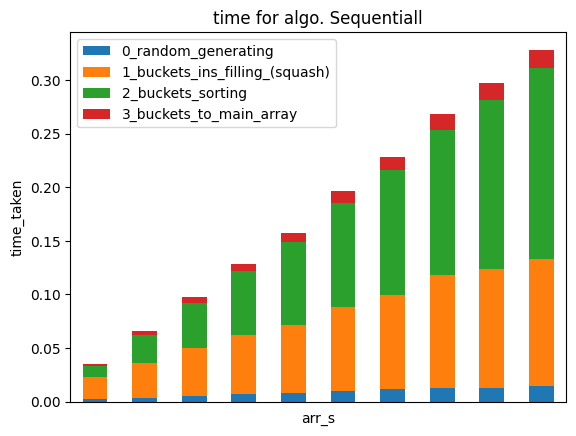

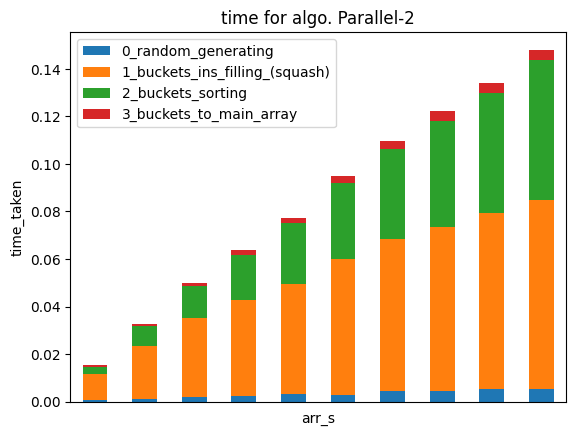

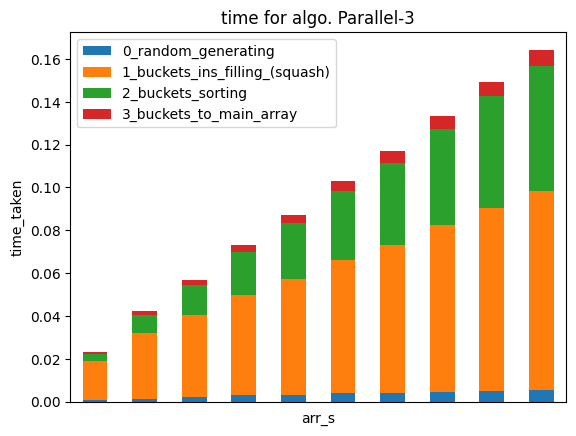

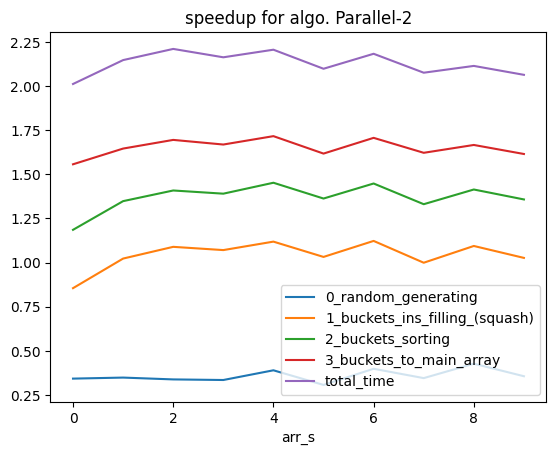

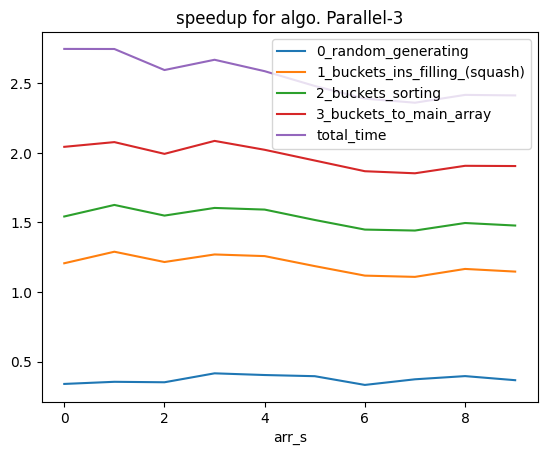

In [138]:
i = 3
df = get_data(f'buckets{i}.txt', [0, 2, 3])
stats_print(df, 'arr_s')

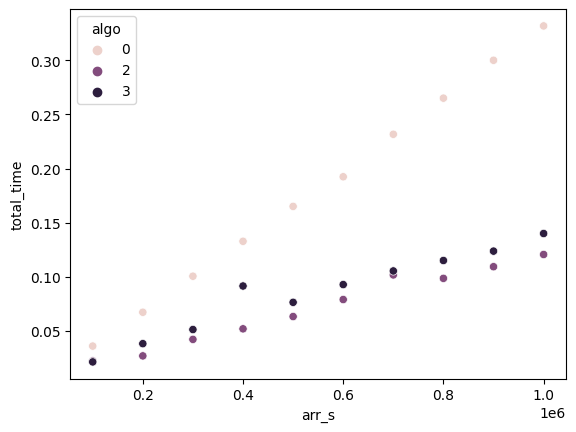

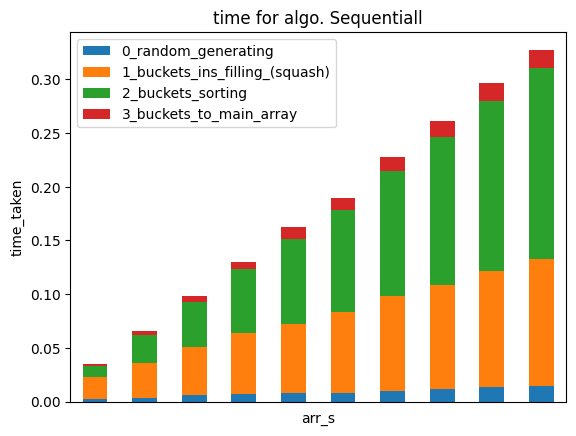

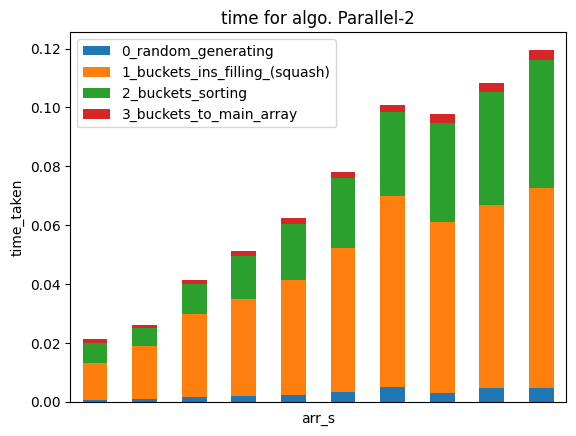

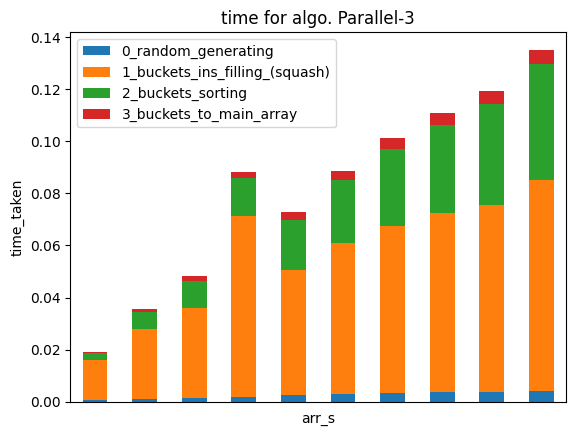

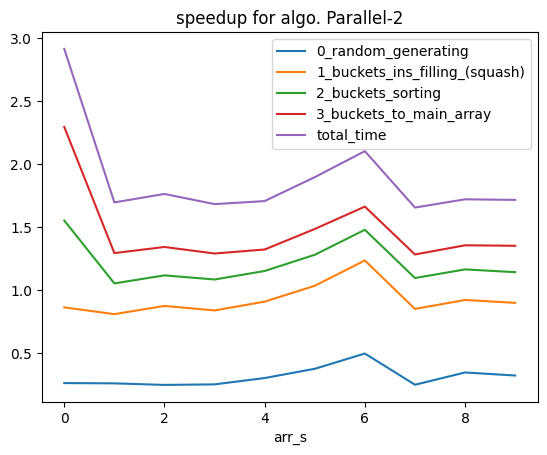

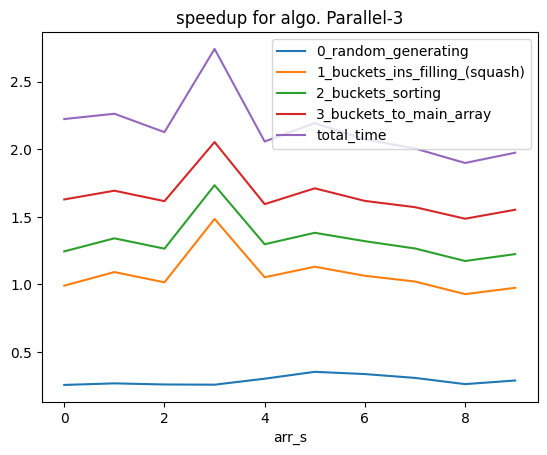

In [139]:
i = 4
df = get_data(f'buckets{i}.txt', [0, 2, 3])
stats_print(df, 'arr_s')

## total time vs buckets_no

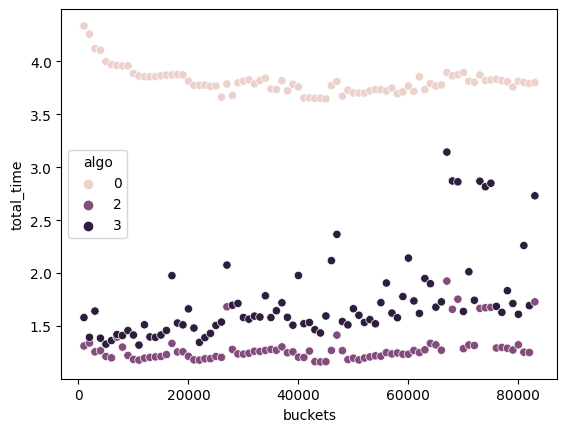

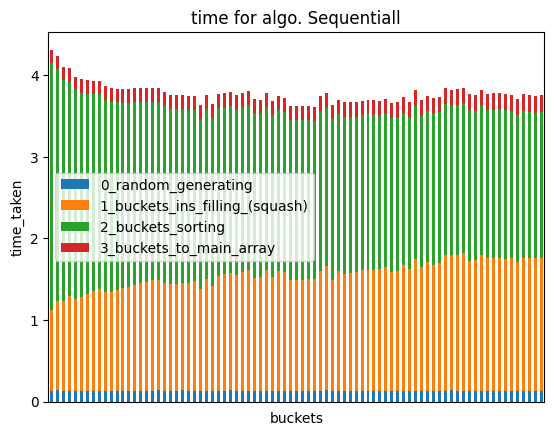

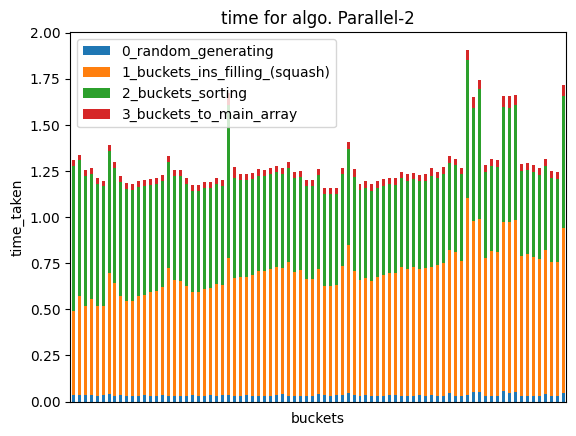

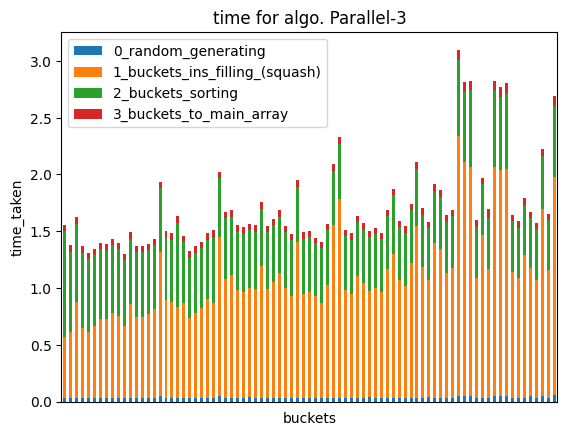

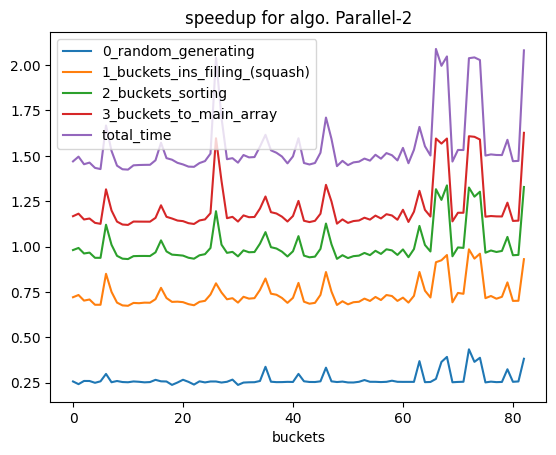

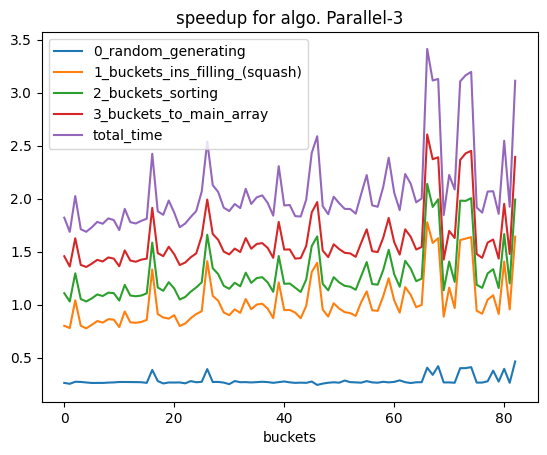

In [140]:
df = get_data(f'lab2-per-bucket.txt', [0, 2, 3])
stats_print(df, 'buckets')